# Knn classifier Animals Data Assignment 

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
data = pd.read_csv('Zoo.csv')

In [48]:
data.head() # zoo data first data 

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [49]:
data.keys() # keys fearues and type target in our data set 

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [60]:
features = data.drop(columns=['animal name','type'],axis = 1)

In [43]:
features = data.columns[:1:-1].tolist()
print(data.shape)

(101, 18)


In [62]:
features.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [36]:
#features=data.drop(['type','animal name'],axis=1).values

In [63]:
#Checking if there is any existing null value or not
data.isnull().sum() 

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [64]:
y=data['type'].values
print(data.shape)

(101, 18)


In [65]:
features.keys() # what keys inside features available 

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

# EDA

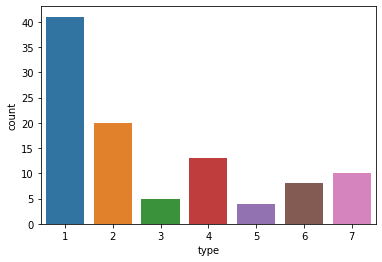

In [30]:
sns.countplot(data['type'])
plt.show()

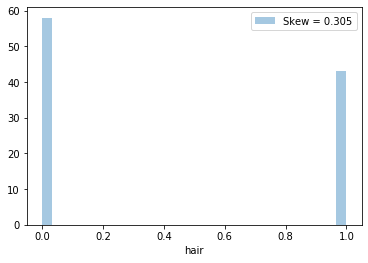

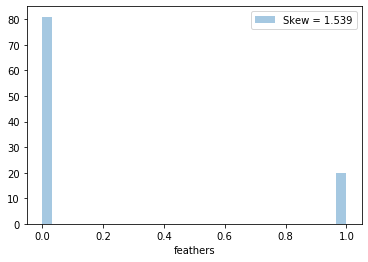

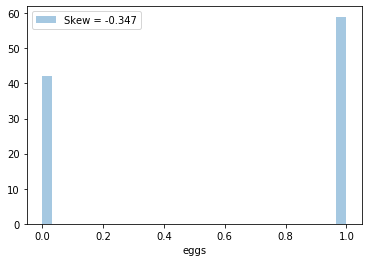

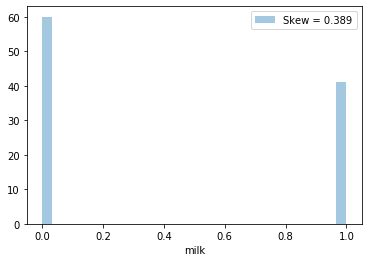

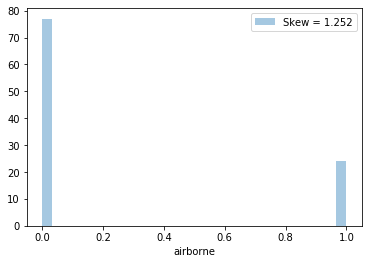

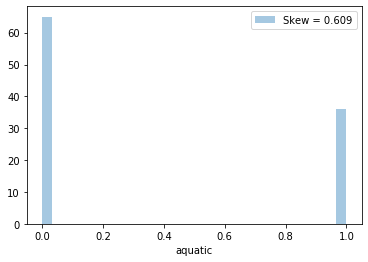

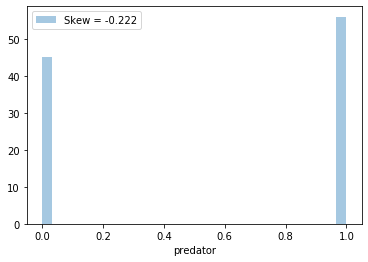

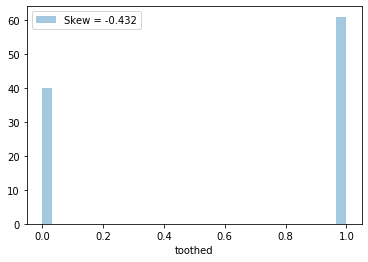

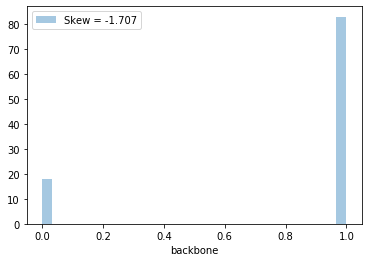

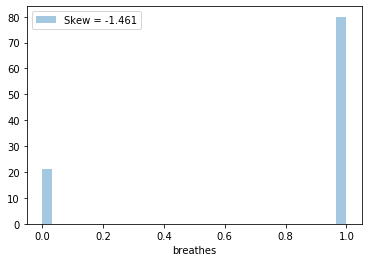

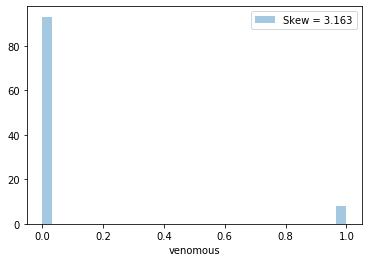

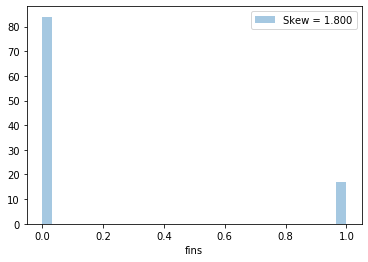

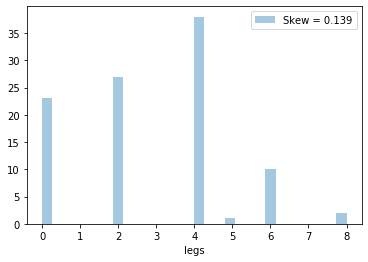

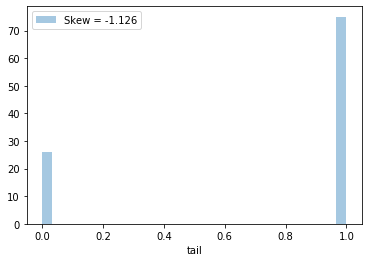

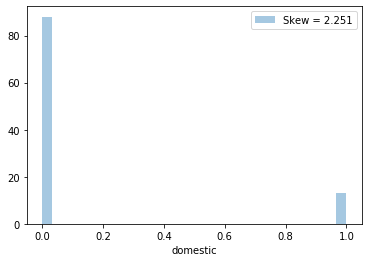

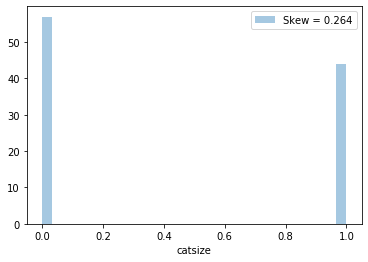

In [67]:
for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Train Test Split

In [74]:
# Define X as features and y as lablels
from sklearn.model_selection import train_test_split
X = features 
y = data['type'] 
# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

# Scaling and Standardization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
scaler.fit(data.drop('animal name',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
scaled_features = scaler.transform(data.drop('animal name',axis=1))

In [87]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1]) # removed last column also
df_feat.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451


In [88]:
features_boxcox # transfprmed values , features 

array([[0.45642907, 0.        , 0.        , ..., 0.        , 0.        ,
        0.48127173],
       [0.45642907, 0.        , 0.        , ..., 6.0956063 , 0.        ,
        0.48127173],
       [0.        , 0.        , 1.21030169, ..., 6.0956063 , 0.        ,
        0.        ],
       ...,
       [0.45642907, 0.        , 0.        , ..., 6.0956063 , 0.        ,
        0.48127173],
       [0.        , 0.        , 1.21030169, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14157398, 1.21030169, ..., 6.0956063 , 0.        ,
        0.        ]])

# Using KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [91]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations

In [92]:
pred = knn.predict(X_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
print(confusion_matrix(y_test,pred))

[[7 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [96]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21



# Choosing a K Value

In [97]:
# instantiate
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 30)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# test accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.5238095238095238


In [98]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

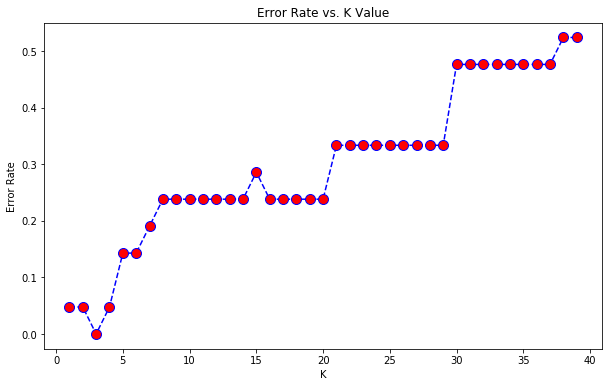

In [99]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [101]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[6 0 1 0 0 0]
 [0 5 0 0 0 0]
 [0 3 0 0 0 0]
 [2 0 0 0 0 0]
 [2 0 0 0 0 0]
 [1 1 0 0 0 0]]


              precision    recall  f1-score   support

           1       0.55      0.86      0.67         7
           2       0.56      1.00      0.71         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.52        21
   macro avg       0.18      0.31      0.23        21
weighted avg       0.31      0.52      0.39        21



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
